In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
tr=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/halosprop2_R.dat')
ts=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/halosprop2_S.dat')
masa_dm=0.09328805
masa_gs=0.018172996

In [8]:
#inr, = np.where(tr[:,0]<9.56)
#ins, = np.where(ts[:,0]<9.75)
#out,= np.where((ts[:,0]<30) & (ts[:,0]>25 ))

inr, = np.where(tr[:,0]<13)
ins, = np.where(ts[:,0]<10)
out,= np.where((ts[:,0]<30) & (ts[:,0]>25 ))

[]

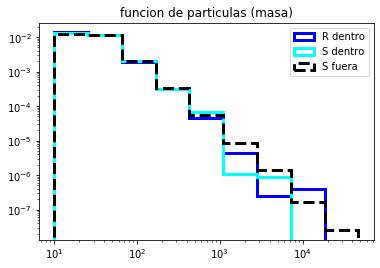

In [9]:
#aca 'dentro' son los respectivos radios de void (9.5 & 9.75)
#la cantidad de particulas de cada halo ES LA QUE ME DA ROCKSTAR
range=(10,np.max(tr[out,5]))
bines=10
minimo=10
maximo=np.max(ts[out,5])
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines)
plt.title('funcion de particulas (masa)')
plt.hist(tr[inr,5],histtype='step',range=range,bins=bines,density='true',lw=3,color='blue',label='R dentro')
plt.hist(ts[ins,5],histtype='step',range=range,bins=bines,density='true',lw=3,color='cyan',label='S dentro')
plt.hist(ts[out,5],histtype='step',range=range,bins=bines,density='true',lw=3,color='black',ls='--',label='S fuera')
plt.legend()
plt.semilogy()
plt.semilogx()

In [5]:
#voy a cortar en 100, 1000 y 10000 ESTO ES TENIENDO EN CUENTA LAS PARTICULAS DE ROCKSTAR 
lm1=120
lm2=300

cut0_r, = np.where((tr[inr,5]<=lm1) & (tr[inr,5]>70))
cut1_r, = np.where((tr[inr,5]>lm1) & (tr[inr,5]<=lm2))
cut2_r, = np.where(tr[inr,5]>lm2)

cut0_s, = np.where((ts[ins,5]<=lm1) & (ts[ins,5]>70))
cut1_s, = np.where((ts[ins,5]>lm1) & (ts[ins,5]<=lm2))
cut2_s, = np.where(ts[ins,5]>lm2)

cut0_u, = np.where((ts[out,5]<=lm1) & (ts[out,5]>70))
cut1_u, = np.where((ts[out,5]>lm1) & (ts[out,5]<=lm2))
cut2_u, = np.where(ts[out,5]>lm2)

In [11]:
#voy a cortar en 100, 1000 y 10000
# ACA MIRO LAS PARTIUCLAS QUE YO IDENTIFICO 
lm1=120
lm2=300
lm3=1000

cut0_r, = np.where((tr[inr,7]<=lm1) & (tr[inr,6]>60))
cut1_r, = np.where((tr[inr,7]>lm1) & (tr[inr,7]<=lm2))
cut2_r, = np.where((tr[inr,7]>lm2) & (tr[inr,7]<lm3))

cut0_s, = np.where((ts[ins,7]<=lm1) & (ts[ins,6]>60))
cut1_s, = np.where((ts[ins,7]>lm1) & (ts[ins,7]<=lm2))
cut2_s, = np.where((ts[ins,7]>lm2)& (ts[ins,7]<lm3))

cut0_u, = np.where((ts[out,7]<=lm1) & (ts[out,6]>60))
cut1_u, = np.where((ts[out,7]>lm1) & (ts[out,7]<=lm2))
cut2_u, = np.where((ts[out,7]>lm2) & (ts[out,7]<lm3))

[]

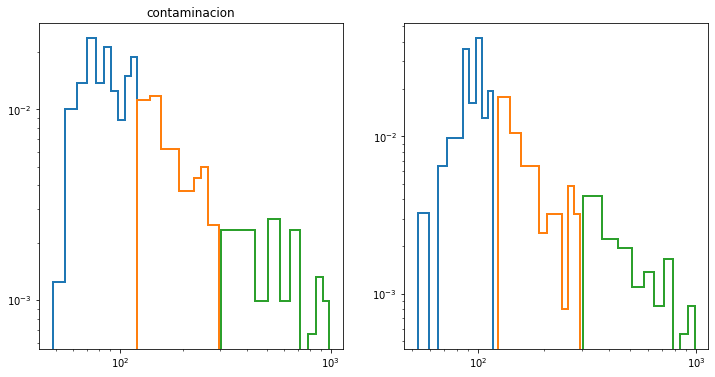

In [12]:
#en estos plots ahora estoy haciendo los histogramas de las particulas QUE YO IDENTIFICO de cada halo para medir 
#el nivel de contaminacion que estoy teniendo.. 
plt.figure(figsize=(12,6))
plt.title('contaminacion')
plt.subplot(121)
plt.title('contaminacion')

plt.hist(tr[inr,7][cut0_r],histtype='step',bins=10,lw=2,density='true')
plt.hist(tr[inr,7][cut1_r],histtype='step',bins=10,lw=2,density='true')
plt.hist(tr[inr,7][cut2_r],histtype='step',bins=10,lw=2,density='true')
plt.semilogy()
plt.semilogx()

plt.subplot(122)
plt.hist(ts[ins,7][cut0_s],histtype='step',bins=10,lw=2,density='true')
plt.hist(ts[ins,7][cut1_s],histtype='step',bins=10,lw=2,density='true')
plt.hist(ts[ins,7][cut2_s],histtype='step',bins=10,lw=2,density='true')
plt.semilogy()
plt.semilogx()

In [13]:
print('corte 1, dentro void S',len(ts[ins,7][cut0_s]))
print('corte 2, dentro void S',len(ts[ins,7][cut1_s]))
print('corte 3, dentro void S',len(ts[ins,7][cut2_s]))

print('corte 1, dentro void R',len(tr[inr,7][cut0_r]))
print('corte 2, dentro void R',len(tr[inr,7][cut1_r]))
print('corte 3, dentro void R',len(tr[inr,7][cut2_r]))

corte 1, dentro void S 48
corte 2, dentro void S 73
corte 3, dentro void S 53
corte 1, dentro void R 111
corte 2, dentro void R 92
corte 3, dentro void R 44


Text(0.5, 0, '$M_{gas}/M_{dm}$')

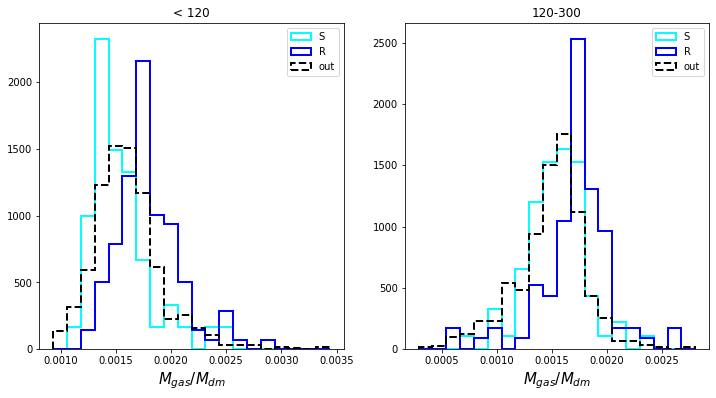

In [15]:
plt.figure(figsize=(15,4))
bines=20
plt.subplot(121)
range=(np.min(ts[out,6][cut0_u]*masa_gs/ts[out,7][cut0_u]*masa_dm),np.max(ts[out,6][cut0_u]*masa_gs/ts[out,7][cut0_u]*masa_dm))
#range=(0.5,np.max(ts[out,6][cut0_u]/ts[out,7][cut0_u]))
plt.title('< 120')
plt.hist(ts[ins,6][cut0_s]*masa_gs/ts[ins,7][cut0_s]*masa_dm,histtype='step',lw=2,range=range,density='true',label='S',color='cyan',bins=bines)
plt.hist(tr[inr,6][cut0_r]*masa_gs/tr[inr,7][cut0_r]*masa_dm,histtype='step',lw=2,range=range,density='true',label='R',color='blue',bins=bines)
plt.hist(ts[out,6][cut0_u]*masa_gs/ts[out,7][cut0_u]*masa_dm,histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='--',bins=bines)
plt.legend()
plt.xlabel('$M_{gas}/M_{dm}$',size=15)

plt.subplot(122)
plt.title('120-300')
range=(np.min(ts[out,6][cut1_u]*masa_gs/ts[out,7][cut1_u]*masa_dm),np.max(ts[out,6][cut1_u]*masa_gs/ts[out,7][cut1_u]*masa_dm))
plt.hist(ts[ins,6][cut1_s]*masa_gs/ts[ins,7][cut1_s]*masa_dm,histtype='step',lw=2,range=range,density='true',label='S',color='cyan',bins=bines)
plt.hist(tr[inr,6][cut1_r]*masa_gs/tr[inr,7][cut1_r]*masa_dm,histtype='step',lw=2,range=range,density='true',label='R',color='blue',bins=bines)
plt.hist(ts[out,6][cut1_u]*masa_gs/ts[out,7][cut1_u]*masa_dm,histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='--',bins=bines)
plt.legend()
plt.xlabel('$M_{gas}/M_{dm}$',size=15)


#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/PostSemi/figuras/Fraccion_cortemasa.png',format='png')

[]

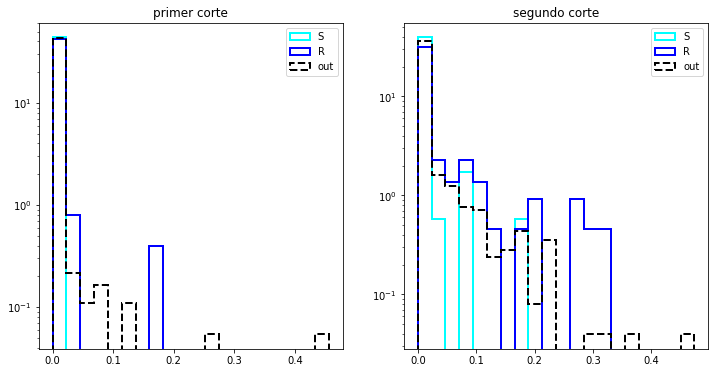

In [10]:
plt.figure(figsize=(12,6))
bines=20
plt.subplot(121)
range=(np.min(ts[out,8][cut0_u]/ts[out,7][cut0_u]),np.max(ts[out,8][cut0_u]/ts[out,7][cut0_u]))
#range=(0.5,np.max(ts[out,6][cut0_u]/ts[out,7][cut0_u]))
plt.title('primer corte')
plt.hist(ts[ins,8][cut0_s]/ts[ins,7][cut0_s],histtype='step',lw=2,range=range,density='true',label='S',color='cyan',bins=bines)
plt.hist(tr[inr,8][cut0_r]/tr[inr,7][cut0_r],histtype='step',lw=2,range=range,density='true',label='R',color='blue',bins=bines)
plt.hist(ts[out,8][cut0_u]/ts[out,7][cut0_u],histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='--',bins=bines)
plt.legend()
plt.semilogy()

plt.subplot(122)
plt.title('segundo corte')
range=(np.min(ts[out,8][cut1_u]/ts[out,7][cut1_u]),np.max(ts[out,8][cut1_u]/ts[out,7][cut1_u]))
plt.hist(ts[ins,8][cut1_s]/ts[ins,7][cut1_s],histtype='step',lw=2,range=range,density='true',label='S',color='cyan',bins=bines)
plt.hist(tr[inr,8][cut1_r]/tr[inr,7][cut1_r],histtype='step',lw=2,range=range,density='true',label='R',color='blue',bins=bines)
plt.hist(ts[out,8][cut1_u]/ts[out,7][cut1_u],histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='--',bins=bines)
plt.legend()
plt.semilogy()


[]

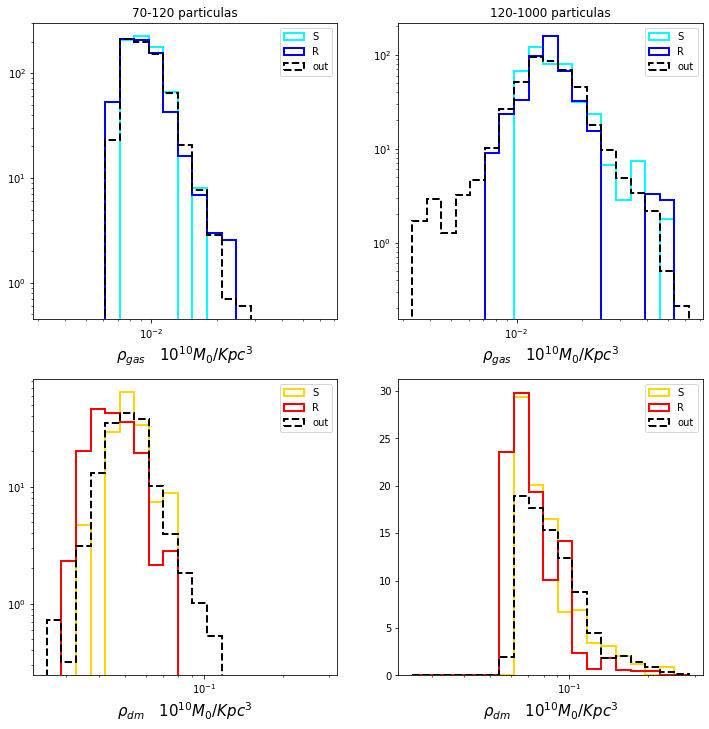

In [13]:
plt.figure(figsize=(12,12))
bines0=20
factor=2

minimo=np.min(ts[out,6][cut1_u]*masa_gs/(factor*ts[out,4][cut1_u]))
maximo=np.max(ts[out,6][cut1_u]*masa_gs/(factor*ts[out,4][cut1_u]))
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)
plt.subplot(221)
factor=2
#minimo=np.min(ts[out,6][cut0_u]*masa_gs/(factor*ts[out,4][cut0_u])) 
#minimo=0.00005
#maximo=np.max(ts[out,6][cut0_u]*masa_gs/(factor*ts[out,4][cut0_u]))
range=(minimo,maximo)
#range=(0.5,np.max(ts[out,6][cut0_u]/ts[out,7][cut0_u]))
plt.title('70-120 particulas')
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)

h1=ts[ins,6][cut0_s]*masa_gs/(factor*ts[ins,4][cut0_s])
h2=tr[inr,6][cut0_r]*masa_gs/(factor*tr[inr,4][cut0_r])
h3=ts[out,6][cut0_u]*masa_gs/(factor*ts[out,4][cut0_u])
plt.hist(h1,histtype='step',lw=2,density='true',label='S',color='cyan',bins=bines)
plt.hist(h2,histtype='step',lw=2,range=range,density='true',label='R',color='blue',bins=bines)
plt.hist(h3,histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='--',bins=bines)
plt.legend()
plt.xlabel('$\\rho_{gas} \hspace{1}10^{10}M_{0}/Kpc^{3}$',size=15)
plt.semilogy()
plt.semilogx()

plt.subplot(222)
plt.title('120-1000 particulas')
minimo=np.min(ts[out,6][cut1_u]*masa_gs/(factor*ts[out,4][cut1_u]))
maximo=np.max(ts[out,6][cut1_u]*masa_gs/(factor*ts[out,4][cut1_u]))
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)

range=(minimo,maximo)
h4=ts[ins,6][cut1_s]*masa_gs/(factor*ts[ins,4][cut1_s])
h5=tr[inr,6][cut1_r]*masa_gs/(factor*tr[inr,4][cut1_r])
h6=ts[out,6][cut1_u]*masa_gs/(factor*ts[out,4][cut1_u])
plt.hist(h4,histtype='step',lw=2,range=range,density='true',label='S',color='cyan',bins=bines)
plt.hist(h5,histtype='step',lw=2,range=range,density='true',label='R',color='blue',bins=bines)
plt.hist(h6,histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='--',bins=bines)
plt.legend()
plt.xlabel('$\\rho_{gas} \hspace{1}10^{10}M_{0}/Kpc^{3}$',size=15)
plt.semilogy()
plt.semilogx()

###############################################################3
###############################################################

plt.subplot(223)
factor=2
minimo=np.min(ts[out,7][cut0_u]*masa_dm/(factor*ts[out,4][cut0_u])) 
#minimo=0.00001
#maximo=np.max(ts[out,7][cut0_u]*masa_dm/(factor*ts[out,4][cut0_u]))
maximo=np.max(ts[out,7][cut1_u]*masa_dm/(factor*ts[out,4][cut1_u]))
range=(minimo,maximo)
#range=(0.5,np.max(ts[out,6][cut0_u]/ts[out,7][cut0_u]))
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)

h1=ts[ins,7][cut0_s]*masa_dm/(factor*ts[ins,4][cut0_s])
h2=tr[inr,7][cut0_r]*masa_dm/(factor*tr[inr,4][cut0_r])
h3=ts[out,7][cut0_u]*masa_dm/(factor*ts[out,4][cut0_u])
plt.hist(h1,histtype='step',lw=2,range=range, density='true',label='S',color='gold',bins=bines)
plt.hist(h2,histtype='step',lw=2,range=range,density='true',label='R',color='red',bins=bines)
plt.hist(h3,histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='--',bins=bines)
plt.legend()
plt.xlabel('$\\rho_{dm} \hspace{1}10^{10}M_{0}/Kpc^{3}$',size=15)
plt.semilogy()
plt.semilogx()

plt.subplot(224)
#minimo=np.min(ts[out,7][cut1_u]*masa_dm/(factor*ts[out,4][cut1_u]))
#maximo=np.max(ts[out,7][cut1_u]*masa_dm/(factor*ts[out,4][cut1_u]))
#bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)

range=(minimo,maximo)
h4=ts[ins,7][cut1_s]*masa_dm/(factor*ts[ins,4][cut1_s])
h5=tr[inr,7][cut1_r]*masa_dm/(factor*tr[inr,4][cut1_r])
h6=ts[out,7][cut1_u]*masa_dm/(factor*ts[out,4][cut1_u])
plt.hist(h4,histtype='step',lw=2,range=range,density='true',label='S',color='gold',bins=bines)
plt.hist(h5,histtype='step',lw=2,range=range,density='true',label='R',color='red',bins=bines)
plt.hist(h6,histtype='step',lw=2,range=range,density='true',label='out',color='black',ls='--',bins=bines)
plt.legend()
plt.xlabel('$\\rho_{dm} \hspace{1}10^{10}M_{0}/Kpc^{3}$',size=15)
#plt.semilogy()
plt.semilogx()

#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/PostSemi/figuras/Densidades_cortemasa.png',format='png')

Text(0.5, 0, '$spin$')

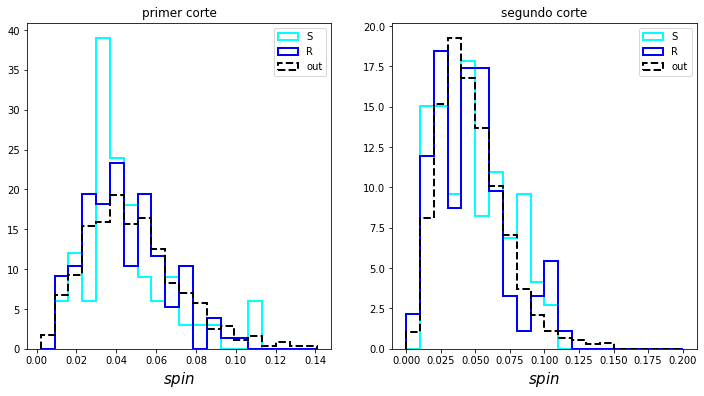

In [14]:
plt.figure(figsize=(12,6))
bines0=20
plt.subplot(121)
rango=(np.min(ts[out,11][cut0_u]),np.max(ts[out,11][cut0_u]))
#range=(0.5,np.max(ts[out,6][cut0_u]/ts[out,7][cut0_u]))

plt.title('primer corte')
plt.hist(ts[ins,11][cut0_s],histtype='step',lw=2,density='true',range=rango,label='S',color='cyan',bins=bines0)
plt.hist(tr[inr,11][cut0_r],histtype='step',lw=2,density='true',range=rango,label='R',color='blue',bins=bines0)
plt.hist(ts[out,11][cut0_u],histtype='step',lw=2,density='true',range=rango,label='out',color='black',ls='--',bins=bines0)
plt.legend()
plt.xlabel('$spin$',size=15)

plt.subplot(122)
plt.title('segundo corte')
rango=(np.min(ts[out,11][cut1_u]),np.max(ts[out,11][cut1_u]))
rango=(0,0.2)
plt.hist(ts[ins,11][cut1_s],histtype='step',lw=2,density='true',range=rango,label='S',color='cyan',bins=bines0)
plt.hist(tr[inr,11][cut1_r],histtype='step',lw=2,density='true',range=rango,label='R',color='blue',bins=bines0)
plt.hist(ts[out,11][cut1_u],histtype='step',lw=2,density='true',range=rango,label='out',color='black',ls='--',bins=bines0)
plt.legend()
plt.xlabel('$spin$',size=15)
#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/PostSemi/figuras/Spin_cortemasa.png',format='png')

(0, 3e-09)

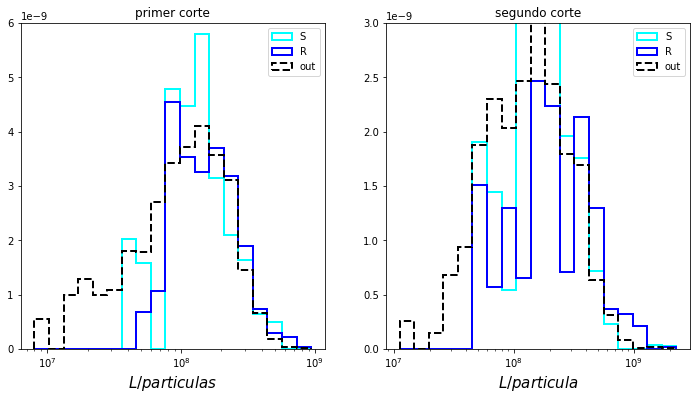

In [15]:
plt.figure(figsize=(12,6))
bines0=20
plt.subplot(121)
minimo=np.min(ts[out,12][cut0_u]/ts[out,5][cut0_u])
maximo=np.max(ts[out,12][cut0_u]/ts[out,5][cut0_u])
#rango=(np.min(ts[out,12][cut0_u]),np.max(ts[out,12][cut0_u]))
#range=(0.5,np.max(ts[out,6][cut0_u]/ts[out,7][cut0_u]))
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)

plt.title('primer corte')
plt.hist(ts[ins,12][cut0_s]/ts[ins,5][cut0_s],histtype='step',lw=2,density='true',range=rango,label='S',color='cyan',bins=bines)
plt.hist(tr[inr,12][cut0_r]/tr[inr,5][cut0_r],histtype='step',lw=2,density='true',range=rango,label='R',color='blue',bins=bines)
plt.hist(ts[out,12][cut0_u]/ts[out,5][cut0_u],histtype='step',lw=2,density='true',range=rango,label='out',color='black',ls='--',bins=bines)
plt.legend()
plt.xlabel('$L/particulas$',size=15)
plt.semilogx()
#plt.semilogy()
plt.ylim(0,6e-9)

plt.subplot(122)
plt.title('segundo corte')
#rango=(np.min(ts[out,12][cut1_u]),np.max(ts[out,12][cut1_u]))
minimo=np.min(ts[out,12][cut1_u]/ts[out,5][cut1_u])
maximo=np.max(ts[out,12][cut1_u]/ts[out,5][cut1_u])
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)

#rango=(0,1)
plt.hist(ts[ins,12][cut1_s]/ts[ins,5][cut1_s],histtype='step',lw=2,density='true',range=rango,label='S',color='cyan',bins=bines)
plt.hist(tr[inr,12][cut1_r]/tr[inr,5][cut1_r],histtype='step',lw=2,density='true',range=rango,label='R',color='blue',bins=bines)
plt.hist(ts[out,12][cut1_u]/ts[out,5][cut1_u],histtype='step',lw=2,density='true',range=rango,label='out',color='black',ls='--',bins=bines)
plt.legend()
plt.xlabel('$L/particula$',size=15)
plt.semilogx()
#plt.semilogy()
plt.ylim(0,3e-9)

#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/PostSemi/figuras/Momangular_cortemasa.png',format='png')

[]

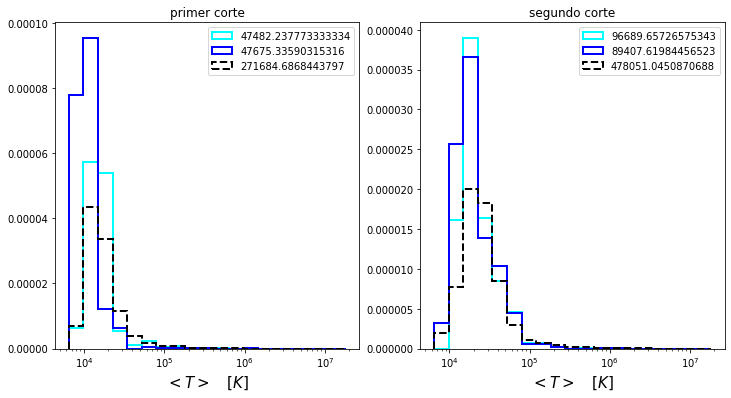

In [17]:
plt.figure(figsize=(12,6))
bines0=20

plt.subplot(121)

#tengo algunos halos con temperatura NAN y tengo que eliminarlos


minimo=np.min(ts[out,13][cut0_u])
#minimo=0.000001
maximo=np.max(ts[out,13][cut0_u])
rango=(np.log10(minimo),np.log10(maximo))

#rango=(np.min(ts[out,12][cut0_u]),np.max(ts[out,12][cut0_u]))
#range=(0.5,np.max(ts[out,6][cut0_u]/ts[out,7][cut0_u]))
#bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)

plt.title('primer corte')
plt.hist(ts[ins,13][cut0_s],histtype='step',lw=2,density='true',range=rango,label=np.mean(ts[ins,13][cut0_s]),color='cyan',bins=bines)
plt.hist(tr[inr,13][cut0_r],histtype='step',lw=2,density='true',range=rango,label=np.mean(tr[inr,13][cut0_r]),color='blue',bins=bines)
plt.hist(ts[out,13][cut0_u],histtype='step',lw=2,density='true',range=rango,label=np.mean(ts[out,13][cut0_u]),color='black',ls='--',bins=bines)
plt.legend()
plt.xlabel('$<T>\hspace{1}[K]$',size=15)
plt.semilogx()
#plt.semilogy()

plt.subplot(122)
plt.title('segundo corte')
#rango=(np.min(ts[out,12][cut1_u]),np.max(ts[out,12][cut1_u]))
minimo=np.min(ts[out,13][cut1_u])
maximo=np.max(ts[out,13][cut1_u])
rango=(np.log10(minimo),np.log10(maximo))
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines0)

#rango=(0,1)
plt.hist(ts[ins,13][cut1_s],histtype='step',lw=2,density='true',range=rango,label=np.mean(ts[ins,13][cut1_s]),color='cyan',bins=bines)
plt.hist(tr[inr,13][cut1_r],histtype='step',lw=2,density='true',range=rango,label=np.mean(tr[inr,13][cut1_r]),color='blue',bins=bines)
plt.hist(ts[out,13][cut1_u],histtype='step',lw=2,density='true',range=rango,label=np.mean(ts[out,13][cut1_u]),color='black',ls='--',bins=bines)
plt.legend()
plt.xlabel('$<T>\hspace{1}[K]$',size=15)
plt.semilogx()
#plt.semilogy()
#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/PostSemi/figuras/temperatura_cortemasa.png',format='png')

In [45]:
np.max(ts[out,13][cut0_u])

10431772.0